In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
## install it at the first time
#pip install imbalanced-learn   

# 1. Data reading and presentation

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv("training_set_features.csv")
label = pd.read_csv("training_set_labels.csv")

In [5]:
print(data.shape)
data.describe().T

(26707, 36)


,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [6]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
print(label.shape)
label.describe().T

(26707, 3)


,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_vaccine,26707.0,0.212454,0.409052,0.0,0.0,0.0,0.0,1.0
seasonal_vaccine,26707.0,0.465608,0.498825,0.0,0.0,0.0,1.0,1.0


In [8]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


# 2. Data Clean

In [9]:
## 2.1 merge

In [10]:
data = label.merge(data, left_on='respondent_id', right_on='respondent_id')
data.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


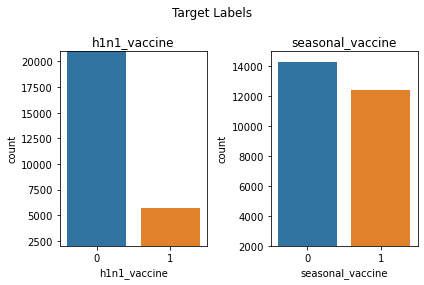

In [11]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Target Labels')
sns.countplot(ax=axs[0], x="h1n1_vaccine", data=data)
axs[0].set_title('h1n1_vaccine')
axs[0].set_ylim(2000, 21000)
sns.countplot(ax=axs[1], x="seasonal_vaccine", data=data)
axs[1].set_title('seasonal_vaccine')
axs[1].set_ylim(2000, 15000)
plt.tight_layout()
plt.show()

In [12]:
data['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [13]:
data['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [14]:
## 2.2 drop

In [15]:
data = data.dropna(thresh=35).copy()  # drop rows that have less than 30 non-NaN
data.shape

(22936, 38)

In [16]:
data.drop("respondent_id",axis = 1,inplace = True)
data.drop("employment_industry",axis = 1,inplace = True)
data.drop("employment_occupation",axis = 1,inplace = True)
data.drop("hhs_geo_region",axis = 1,inplace = True)

In [17]:
### text values to numeric values

In [18]:
data["age_group"].unique() #'55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years','45 - 54 Years'
age_group_mapping = {"18 - 34 Years":1,"35 - 44 Years":2,"45 - 54 Years":3,"55 - 64 Years":4,"65+ Years":5}
data["age_group"] = data["age_group"].replace(age_group_mapping)

data["race"].unique() #'White', 'Black', 'Other or Multiple', 'Hispanic'
race_mapping = {"White":1,"Black":2,"Other or Multiple":3,"Hispanic":4}
data["race"] = data["race"].replace(race_mapping)

data["sex"].unique()
sex_mapping = {"Female":0,"Male":1}
data["sex"] = data["sex"].replace(sex_mapping)

data["census_msa"].unique() #'Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'
census_msa_mapping = {"Non-MSA":0,"MSA, Not Principle  City":1,"MSA, Principle City":2}
data["census_msa"] = data["census_msa"].replace(census_msa_mapping)

data["employment_status"].unique()# 'Not in Labor Force', 'Employed', 'Unemployed'
employment_status_mapping = {'Not in Labor Force':1,'Unemployed':2,"Employed":3}
data["employment_status"] = data["employment_status"].replace(employment_status_mapping)

data["rent_or_own"].unique()# 'Own', 'Rent'
rent_or_own_mapping = {"Own":0,"Rent":1}
data["rent_or_own"] = data["rent_or_own"].replace(rent_or_own_mapping)

data["marital_status"].unique()# 'Not Married', 'Married'
marital_status_mapping = {"Not Married":0,"Married":1}
data["marital_status"] = data["marital_status"].replace(marital_status_mapping)

data["income_poverty"].unique() # 'Below Poverty', '<= $75,000, Above Poverty', '> $75,000'
income_poverty_mapping = {"Below Poverty":1,"<= $75,000, Above Poverty":2,"> $75,000":3}
data["income_poverty"] = data["income_poverty"].replace(income_poverty_mapping)

data["education"].unique().tolist() #['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan]
education_mapping = {"< 12 Years":1,"12 Years":2,"College Graduate":3,"Some College":4}
data["education"] = data["education"].replace(education_mapping)

## 2.3 Filling

In [19]:
# fill by mean

for column in list(data.columns[data.isnull().sum() > 0]):
    mean_val = data[column].mean()
    data[column].fillna(mean_val, inplace=True)
print(data.columns[data.isnull().sum() > 0])


Index([], dtype='object')


In [20]:


data.corrwith(data["education"])
data["education"].replace(np.nan,np.random.randint(1,5),inplace = True)

data.corrwith(data["income_poverty"])
data["income_poverty"].replace(np.nan,np.random.randint(1,4),inplace = True)

abs(data.corrwith(data["marital_status"])).mask(data.corrwith(data["marital_status"]) == 1).max()
data["marital_status"].replace(np.nan,np.random.randint(0,2),inplace = True)

abs(data.corrwith(data["rent_or_own"])).mask(data.corrwith(data["rent_or_own"]) == 1).max()
data["rent_or_own"].replace(np.nan,np.random.randint(0,2),inplace = True)

abs(data.corrwith(data["employment_status"])).mask(data.corrwith(data["employment_status"]) == 1).max()
data["employment_status"].replace(np.nan,np.random.randint(1,4),inplace = True)

data["h1n1_concern"].corr(data["h1n1_vaccine"])
for i in range(4):
    len(data[(data["h1n1_concern"] == i ) & (data["h1n1_vaccine"] == 1)])
data["h1n1_concern"].replace(np.nan,np.random.randint(0,4),inplace = True)

data["h1n1_knowledge"].unique()# 0.,  2.,  1
data["h1n1_knowledge"].replace(np.nan,np.random.randint(0,3),inplace = True) 

print(data["health_worker"].corr(label["h1n1_vaccine"])) 
print(data["health_worker"].corr(label["seasonal_vaccine"]))
data["health_worker"].replace(np.nan,np.random.randint(0,2),inplace = True)

print(data["health_insurance"].corr(label["h1n1_vaccine"]))
print(data["health_insurance"].corr(label["seasonal_vaccine"]))
data["health_insurance"].replace(np.nan,np.random.randint(0,2),inplace = True)

print(data["opinion_h1n1_vacc_effective"].corr(label["h1n1_vaccine"]))
print(data["opinion_h1n1_vacc_effective"].corr(label["seasonal_vaccine"]))
data["opinion_h1n1_vacc_effective"].replace(np.nan,np.random.randint(1,6),inplace = True)

print(data["opinion_seas_vacc_effective"].corr(label["h1n1_vaccine"]))
print(data["opinion_seas_vacc_effective"].corr(label["seasonal_vaccine"]))
data["opinion_seas_vacc_effective"].replace(np.nan,np.random.randint(1,6),inplace = True)

missingData = data.isnull()
missingData_list = []
for column in missingData.columns.values.tolist():
    if(missingData[column].value_counts().mode()[0].sum() < 26707):
        missingData_list.append(column) 
print(missingData_list) 

0.17256105833620747
0.13360430643225793
0.10490397717655323
0.1581378916039776
0.2751074505385841
0.21377625181415225
0.18611721372705708
0.36337497942988584
['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'household_adults', 'household_children']


In [21]:
data_corr = data.corr()

missingData_list1 = [m for m in missingData_list if m in data_corr.columns] 
missingData_list2 = [m for m in missingData_list if m not in data_corr.columns]

data_corr = data_corr[missingData_list1]
max_value = data_corr[data_corr.abs() < 1].max(axis=0)
max_corr_row = data_corr.abs().eq(max_value).idxmax()
max_corr_row

for col in missingData_list1:
    print(col + "   "+ data_corr.loc[max_corr_row[col],col].astype(np.str))

h1n1_vaccine   0.39355001258976335
seasonal_vaccine   0.4062825008797649
h1n1_concern   0.37679145853909085
h1n1_knowledge   0.23190782414038882
behavioral_antiviral_meds   0.14661446996147015
behavioral_avoidance   0.3357944477213812
behavioral_face_mask   0.1782028239224796
behavioral_wash_hands   0.36345049019157977
behavioral_large_gatherings   0.5857807188022734
behavioral_outside_home   0.5857807188022734
behavioral_touch_face   0.36345049019157977
doctor_recc_h1n1   0.5982195282478109
doctor_recc_seasonal   0.5982195282478109
chronic_med_condition   0.20939089149765375
child_under_6_months   0.09332340691117917
health_worker   0.20462724685872652
health_insurance   0.18888842616876067
opinion_h1n1_vacc_effective   0.4728312940012031
opinion_h1n1_risk   0.5649512719816984
opinion_h1n1_sick_from_vacc   0.49045062464226313
opinion_seas_vacc_effective   0.4728312940012031
opinion_seas_risk   0.5649512719816984
opinion_seas_sick_from_vacc   0.49045062464226313
age_group   0.280433162

In [22]:
missingData_list3 = [col for col in missingData_list1 if data_corr.loc[max_corr_row[col],col] > 0.5]
missingData_list1 = [i for i in missingData_list1 if i not in missingData_list3]
for i in missingData_list1:
    missingData_list2.append(i) 
    
missingData_list1 = missingData_list3

for i in missingData_list1:
    print(i + " ---- "+ max_corr_row[i] + " : "+data_corr.loc[max_corr_row[i],i].astype(np.str))

behavioral_large_gatherings ---- behavioral_outside_home : 0.5857807188022734
behavioral_outside_home ---- behavioral_large_gatherings : 0.5857807188022734
doctor_recc_h1n1 ---- doctor_recc_seasonal : 0.5982195282478109
doctor_recc_seasonal ---- doctor_recc_h1n1 : 0.5982195282478109
opinion_h1n1_risk ---- opinion_seas_risk : 0.5649512719816984
opinion_seas_risk ---- opinion_h1n1_risk : 0.5649512719816984


In [23]:
data["behavioral_large_gatherings"].fillna(data["behavioral_outside_home"],inplace = True) 
data["behavioral_large_gatherings"].replace(np.nan,np.random.randint(0, 2),inplace = True)
data["behavioral_outside_home"].fillna(data["behavioral_large_gatherings"],inplace = True)
data["doctor_recc_h1n1"].fillna(data["doctor_recc_seasonal"],inplace = True) 
data["doctor_recc_h1n1"].replace(np.nan,np.random.randint(0, 2),inplace = True)
data["doctor_recc_seasonal"].fillna(data["doctor_recc_h1n1"],inplace = True)
data["opinion_h1n1_risk"].fillna(data["opinion_seas_risk"],inplace = True)
data["opinion_h1n1_risk"].replace(np.nan,np.random.randint(1, 6),inplace = True)
data["opinion_seas_risk"].fillna(data["opinion_h1n1_risk"],inplace = True)

for i in missingData_list2:
    print(i)

h1n1_vaccine
seasonal_vaccine
h1n1_concern
h1n1_knowledge
behavioral_antiviral_meds
behavioral_avoidance
behavioral_face_mask
behavioral_wash_hands
behavioral_touch_face
chronic_med_condition
child_under_6_months
health_worker
health_insurance
opinion_h1n1_vacc_effective
opinion_h1n1_sick_from_vacc
opinion_seas_vacc_effective
opinion_seas_sick_from_vacc
age_group
education
race
sex
income_poverty
marital_status
rent_or_own
employment_status
census_msa
household_adults
household_children


In [24]:
mean_normloss = data["behavioral_antiviral_meds"].astype("float").mean(axis=0)
data["behavioral_antiviral_meds"].replace(np.nan, mean_normloss, inplace=True)
mean_normloss = data["behavioral_avoidance"].astype("float").mean(axis=0)
data["behavioral_avoidance"].replace(np.nan, mean_normloss, inplace=True)
mean_normloss = data["behavioral_face_mask"].astype("float").mean(axis=0) 
data["behavioral_face_mask"].replace(np.nan, mean_normloss, inplace=True)
mean_normloss = data["behavioral_wash_hands"].astype("float").mean(axis=0) 
data["behavioral_wash_hands"].replace(np.nan, mean_normloss, inplace=True)
mean_normloss = data["behavioral_touch_face"].astype("float").mean(axis=0)
data["behavioral_touch_face"].replace(np.nan, mean_normloss, inplace=True)
mean_normloss = data["chronic_med_condition"].astype("float").mean(axis=0) 
data["chronic_med_condition"].replace(np.nan, mean_normloss, inplace=True)
mean_normloss = data["child_under_6_months"].astype("float").mean(axis=0)
data["child_under_6_months"].replace(np.nan, mean_normloss, inplace=True)
mean_normloss = data["opinion_h1n1_sick_from_vacc"].astype("float").mean(axis=0)
data["opinion_h1n1_sick_from_vacc"].replace(np.nan, mean_normloss, inplace=True)
mean_normloss = data["household_adults"].astype("float").mean(axis=0) 
data["household_adults"].replace(np.nan, mean_normloss, inplace=True)
mean_normloss = data["household_children"].astype("float").mean(axis=0) 
data["household_children"].replace(np.nan, mean_normloss, inplace=True)
mean_normloss = data["opinion_seas_sick_from_vacc"].astype("float").mean(axis=0) 
data["opinion_seas_sick_from_vacc"].replace(np.nan, mean_normloss, inplace=True)

In [25]:
missingData_new = data.isnull().sum().to_frame()
missingData_new.T

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. feature selection

## 3.1 data preparing for h1n1 and seasonal

In [26]:
X_h1n1 = data.iloc[:, 2:]
X_seasonal = data.iloc[:, 2:]
y_h1n1 = data.iloc[:, 0]
y_seasonal = data.iloc[:, 1]
y_seasonal.describe().T

count    22936.000000
mean         0.471486
std          0.499197
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: seasonal_vaccine, dtype: float64

In [27]:
X_h1n1.shape

(22936, 32)

In [28]:
y_h1n1.shape

(22936,)

In [29]:
y_seasonal.shape

(22936,)

## 3.2 selection for h1n1

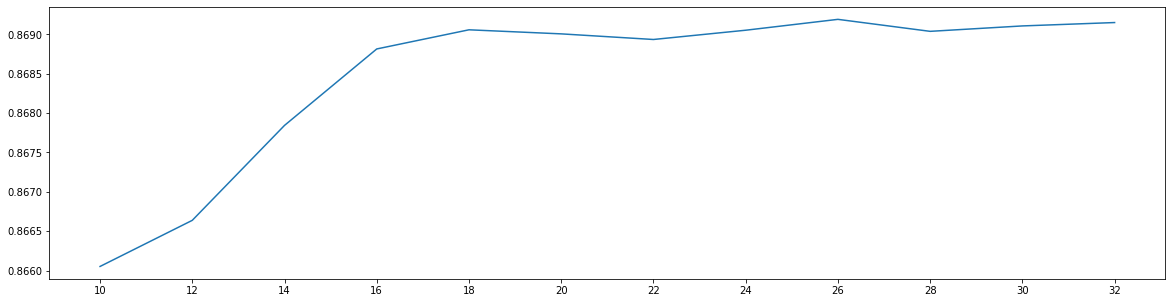

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
 
GBC_ = GradientBoostingClassifier(n_estimators=100,random_state=0).fit(X_h1n1,y_h1n1)
score = []
for i in range(10,33,2):
    x_wrapper = RFE(GBC_,n_features_to_select=i,step=2).fit_transform(X_h1n1,y_h1n1)
    once = cross_val_score(GradientBoostingClassifier(),x_wrapper,y_h1n1,cv=5,scoring='roc_auc').mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,33,2),score)
plt.xticks(range(10,33,2))
plt.show()

In [34]:
from sklearn.feature_selection import RFE
randomFs = GradientBoostingClassifier(n_estimators=100,random_state=0)
randomFs = randomFs.fit(X_h1n1,y_h1n1)
selector = RFE(randomFs,n_features_to_select=26,step=2)
X_h1n1_select = selector.fit_transform(X_h1n1,y_h1n1)

## 3.3 selection for seasonal

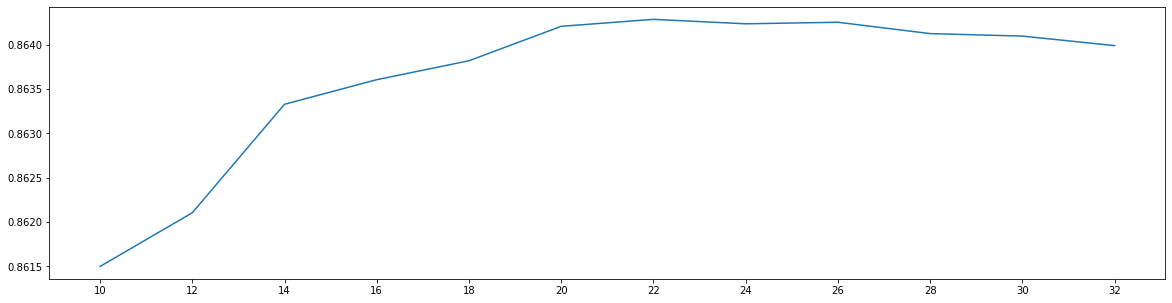

In [35]:
GBC_ = GradientBoostingClassifier(n_estimators=100,random_state=0).fit(X_seasonal,y_seasonal)
score = []
for i in range(10,33,2):
    x_wrapper = RFE(GBC_,n_features_to_select=i,step=2).fit_transform(X_seasonal,y_seasonal)
    once = cross_val_score(GradientBoostingClassifier(),x_wrapper,y_seasonal,cv=5,scoring='roc_auc').mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,33,2),score)
plt.xticks(range(10,33,2))
plt.show()

In [76]:
randomFs = GradientBoostingClassifier(n_estimators=100,random_state=0)
randomFs = randomFs.fit(X_seasonal,y_seasonal)
selector = RFE(randomFs,n_features_to_select=22,step=2)
X_seasonal_select = selector.fit_transform(X_seasonal,y_seasonal)

# 4. Data modelling

## 4.1 standard

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_seasonal_std = scaler.fit_transform(X_seasonal_select)
X_h1n1_std = scaler.fit_transform(X_h1n1_select)

## 4.2 split data set

In [78]:
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_seasonal_std, y_seasonal, test_size = 0.3, random_state = 0)
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_h1n1_std, y_h1n1, test_size = 0.3, random_state = 0)


## oversampling

In [79]:
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
smo = BorderlineSMOTE(random_state = 42)
Xh_train,yh_train = smo.fit_resample(Xh_train,yh_train)

print('Resampled dataset shape %s' % Counter(yh_train))

Resampled dataset shape Counter({0: 12462, 1: 12462})


## undersampling

In [80]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
Xs_train, ys_train = rus.fit_resample(Xs_train, ys_train)
print('Resampled dataset shape %s' % Counter(ys_train))

Resampled dataset shape Counter({0: 7565, 1: 7565})


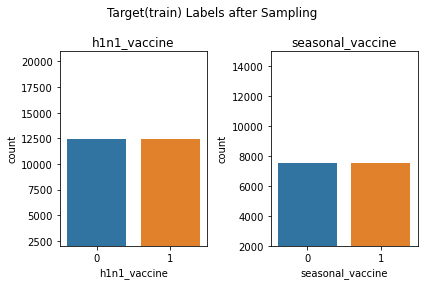

In [81]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Target(train) Labels after Sampling')

sns.countplot(ax=axs[0], x=yh_train)
axs[0].set_title('h1n1_vaccine')
axs[0].set_ylim(2000, 21000)

sns.countplot(ax=axs[1], x=ys_train)
axs[1].set_title('seasonal_vaccine')
axs[1].set_ylim(2000, 15000)

plt.tight_layout()
plt.show()

## 4.3 model comparing.

In [82]:
### 4.3.1 compare based on h1n1

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [84]:
score = cross_val_score(MLPClassifier(), Xh_train, yh_train, scoring='roc_auc', cv=5)
print(np.average(score))

0.9174532375095387


In [85]:
score_dtr = cross_val_score(tree.DecisionTreeClassifier(), Xh_train, yh_train, scoring='roc_auc', cv=5)
print(np.average(score_dtr))

0.8387874813522807


In [86]:
score_svm = cross_val_score(svm.SVC(), Xh_train, yh_train, scoring='roc_auc', cv=5)
print(np.average(score_svm))

0.9195542953230766


In [87]:
scores_lr = cross_val_score(LogisticRegression(), Xh_train, yh_train, scoring='roc_auc', cv=5)
print(np.average(scores_lr))

0.8328177455111392


In [88]:
scores_gbc = cross_val_score(GradientBoostingClassifier(), Xh_train, yh_train, scoring='roc_auc', cv=5)
print(np.average(scores_gbc))

0.956383155835032


### 4.3.2 compare based on seasonal

In [89]:
score = cross_val_score(MLPClassifier(), Xs_train, ys_train, scoring='roc_auc', cv=5)
print(np.average(score))

0.8421760909744977


In [90]:
score_dtr = cross_val_score(tree.DecisionTreeClassifier(), Xs_train, ys_train, scoring='roc_auc', cv=5)
print(np.average(score_dtr))

0.6924698001763959


In [91]:
score_svm = cross_val_score(svm.SVC(), Xs_train, ys_train, scoring='roc_auc', cv=5)
print(np.average(score_svm))

0.8560517812358983


In [92]:
scores_lr = cross_val_score(LogisticRegression(), Xs_train, ys_train, scoring='roc_auc', cv=5)
print(np.average(scores_lr))

0.856116695621861


In [93]:
scores_gbc = cross_val_score(GradientBoostingClassifier(), Xs_train, ys_train, scoring='roc_auc', cv=5)
print(np.average(scores_gbc))

0.8657258594712754


# 5. parameters tune

## 5.1 get best parameters of H1N1

In [97]:
param_test_h = {'learning_rate':[0.1,0.01],
                'max_depth':range(10, 15, 1)}
gsearch_h = GridSearchCV(estimator = GradientBoostingClassifier(
                                     min_samples_split = 2,
                                     min_samples_leaf = 1, 
                                     n_estimators = 100), 
                       param_grid = param_test_h, scoring='accuracy', cv=5)
gsearch_h.fit(Xh_train,yh_train)
gsearch_h.best_params_, gsearch_h.best_score_, gsearch_h.cv_results_['mean_test_score']

({'learning_rate': 0.1, 'max_depth': 13},
 0.8876610811567931,
 array([0.88613659, 0.88637732, 0.88669822, 0.88766108, 0.88641721,
        0.87345755, 0.87510269, 0.87430029, 0.87185281, 0.86952572]))

## 5.2 get best parameters of seasonal

In [99]:
param_test_s = {'learning_rate':[0.1,0.01],
                'max_depth':range(2, 5, 1)}
gsearch_s = GridSearchCV(estimator = GradientBoostingClassifier(
                                     min_samples_split = 2,
                                     min_samples_leaf = 1, 
                                     n_estimators = 100), 
                       param_grid = param_test_s, scoring='accuracy', cv=5)
gsearch_s.fit(Xs_train,ys_train)
gsearch_s.best_params_, gsearch_s.best_score_, gsearch_s.cv_results_['mean_test_score']

({'learning_rate': 0.1, 'max_depth': 3},
 0.788631857237277,
 array([0.78645076, 0.78863186, 0.78777264, 0.75670853, 0.76966292,
        0.77138136]))

# 6. evaluation

## 6.1 evaluation for seasonal

In [100]:
gbdts = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_leaf =1, 
               min_samples_split =2)
gbdts.fit(Xs_train,ys_train)
ys_pred = gbdts.predict(Xs_test)
ys_predprob = gbdts.predict_proba(Xs_test)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(ys_test, ys_pred))
print ("AUC Score (Test): %f" % metrics.roc_auc_score(ys_test, ys_predprob))

Accuracy : 0.7849
AUC Score (Test): 0.857688


              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3632
           1       0.77      0.77      0.77      3249

    accuracy                           0.78      6881
   macro avg       0.78      0.78      0.78      6881
weighted avg       0.78      0.78      0.78      6881



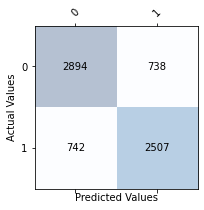

In [101]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(ys_test, ys_pred)
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
            s=cm[i, j], 
            va='center', ha='center')
        
classes=["0","1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');
print(classification_report(ys_test, ys_pred ))

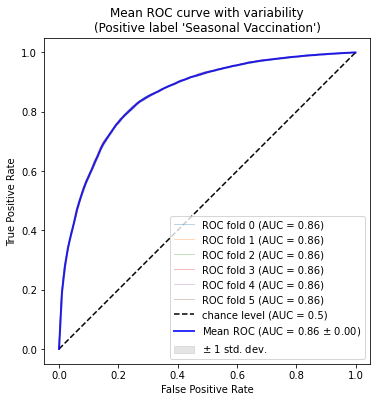

In [103]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=6)
classifier = gbdts

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(Xs_train, ys_train)):
    classifier.fit(Xs_train[train], ys_train[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        Xs_test,
        ys_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label 'Seasonal Vaccination')",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

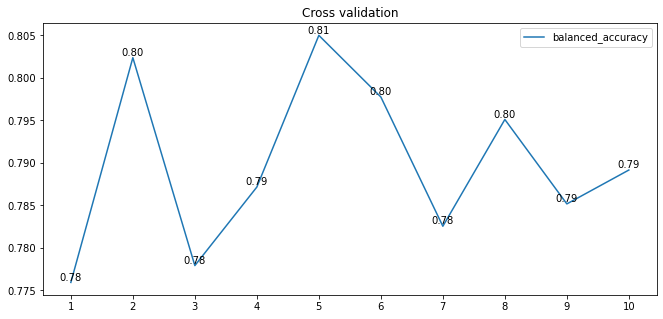

In [104]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbdts, Xs_train, ys_train, cv=10,scoring='balanced_accuracy')
plt.figure(figsize=(11,5))
labels = [1, 2, 3, 4, 5,6,7,8,9,10]
plt.plot(labels, scores, label=u'balanced_accuracy')
plt.xticks(labels)
for x, y in zip((labels), scores):
    plt.text(x, y,"%.2f" % y, ha="center", va="bottom",fontsize=10)
plt.title("Cross validation")
plt.legend()
plt.show()

## 6.2 evaluation for h1n1

In [105]:
gbdth = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=13, min_samples_leaf =1, 
               min_samples_split =2)
gbdth.fit(Xh_train,yh_train)
yh_pred = gbdth.predict(Xh_test)
yh_predprob = gbdth.predict_proba(Xh_test)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(yh_test, yh_pred))
print ("AUC Score (Test): %f" % metrics.roc_auc_score(yh_test, yh_predprob))

Accuracy : 0.8303
AUC Score (Test): 0.831652


              precision    recall  f1-score   support

           0       0.87      0.92      0.89      5321
           1       0.66      0.53      0.59      1560

    accuracy                           0.83      6881
   macro avg       0.76      0.72      0.74      6881
weighted avg       0.82      0.83      0.82      6881



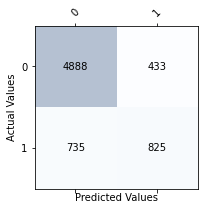

In [107]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(yh_test, yh_pred)
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
            s=cm[i, j], 
            va='center', ha='center')
        
classes=["0","1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');
print(classification_report(yh_test, yh_pred ))

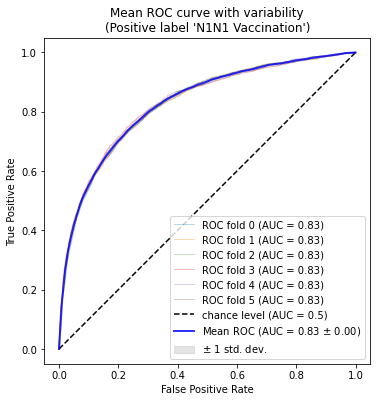

In [108]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=6)
classifier = gbdth

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(Xh_train, yh_train)):
    classifier.fit(Xh_train[train], yh_train[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        Xh_test,
        yh_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label 'N1N1 Vaccination')",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

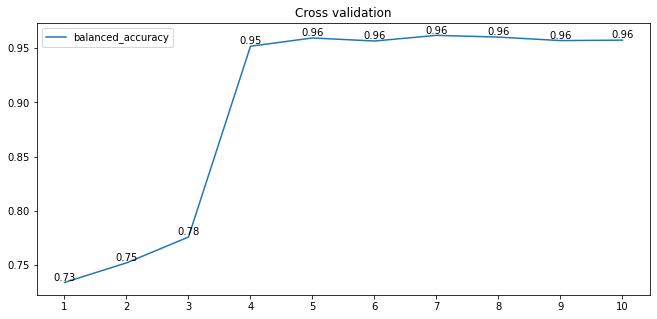

In [109]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbdth, Xh_train, yh_train, cv=10,scoring='balanced_accuracy')
plt.figure(figsize=(11,5))
labels = [1, 2, 3, 4, 5,6,7,8,9,10]
plt.plot(labels, scores, label=u'balanced_accuracy')
plt.xticks(labels)
for x, y in zip((labels), scores):
    plt.text(x, y,"%.2f" % y, ha="center", va="bottom",fontsize=10)
plt.title("Cross validation")
plt.legend()
plt.show()

# History work which is mentioned in report

In [ ]:
"""
print(data["age_group"].corr(label["h1n1_vaccine"]))
print(data["age_group"].corr(label["seasonal_vaccine"]))
print(data["race"].corr(label["h1n1_vaccine"]))
print(data["race"].corr(label["seasonal_vaccine"]))
data.drop("race",axis = 1,inplace = True)

print(data["sex"].corr(label["h1n1_vaccine"]))
print(data["sex"].corr(label["seasonal_vaccine"]))
data.drop("sex",axis = 1,inplace = True)

print(data["census_msa"].corr(label["h1n1_vaccine"]))
print(data["census_msa"].corr(label["seasonal_vaccine"]))
data.drop("census_msa",axis = 1,inplace = True)

data["behavioral_antiviral_meds"].corr(label["h1n1_vaccine"])
data["behavioral_antiviral_meds"].corr(label["seasonal_vaccine"])
data.drop("behavioral_antiviral_meds",axis = 1,inplace = True)

data["behavioral_avoidance"].corr(label["h1n1_vaccine"])
data["behavioral_avoidance"].corr(label["seasonal_vaccine"])
data.drop("behavioral_avoidance",axis = 1,inplace = True)

data["behavioral_face_mask"].corr(label["h1n1_vaccine"])
data["behavioral_face_mask"].corr(label["seasonal_vaccine"])
data.drop("behavioral_face_mask",axis = 1,inplace = True)

data["behavioral_wash_hands"].corr(label["h1n1_vaccine"])
data["behavioral_wash_hands"].corr(label["seasonal_vaccine"])
data.drop("behavioral_wash_hands",axis = 1,inplace = True)

data["behavioral_touch_face"].corr(label["h1n1_vaccine"])
data["behavioral_touch_face"].corr(label["seasonal_vaccine"])
data.drop("behavioral_touch_face",axis = 1,inplace = True)

data["chronic_med_condition"].corr(label["h1n1_vaccine"])
data["chronic_med_condition"].corr(label["seasonal_vaccine"])
data.drop("chronic_med_condition",axis = 1,inplace = True)

data["child_under_6_months"].corr(label["h1n1_vaccine"])
data["child_under_6_months"].corr(label["seasonal_vaccine"])
data.drop("child_under_6_months",axis = 1,inplace = True)

print(data["opinion_h1n1_sick_from_vacc"].corr(label["h1n1_vaccine"])) 
print(data["opinion_h1n1_sick_from_vacc"].corr(label["seasonal_vaccine"]))
data.drop("opinion_h1n1_sick_from_vacc",axis = 1,inplace = True)

data["opinion_seas_sick_from_vacc"].corr(label["h1n1_vaccine"])
data["opinion_seas_sick_from_vacc"].corr(label["seasonal_vaccine"])
data.drop("opinion_seas_sick_from_vacc",axis = 1,inplace = True)

data["household_adults"].corr(label["h1n1_vaccine"])
data["household_adults"].corr(label["seasonal_vaccine"])
data.drop("household_adults",axis = 1,inplace = True)

data["household_children"].corr(label["h1n1_vaccine"]) 
data["household_children"].corr(label["seasonal_vaccine"])
data.drop("household_children",axis = 1,inplace = True)
"""